In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Performing EDA

In [2]:
deli=pd.read_csv("C:\\Users\\Hi\\Desktop\\ExceLR Assignments\\delivery_time.csv")
deli.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
deli.info() #here we dont have null values or NA values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
deli.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


C:\Users\Hi\AppData\Local\Temp\ipykernel_10920\2751119043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deli['Delivery_Time'])#here we can see that Delivery_time data Column is normally distributed without any skewness


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

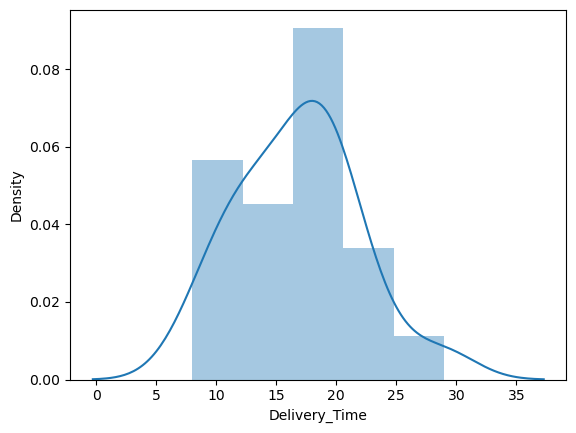

In [5]:
sns.distplot(deli['Delivery_Time'])#here we can see that Delivery_time data Column is normally distributed without any skewness

<AxesSubplot:>

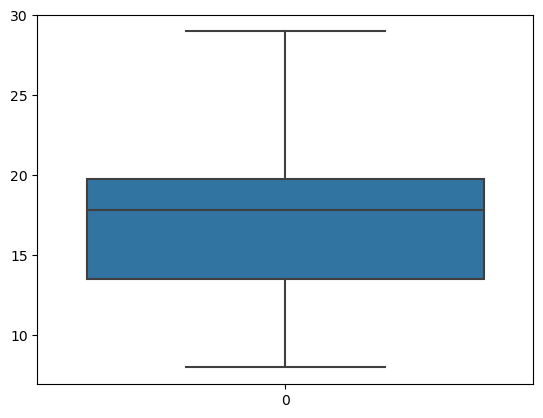

In [6]:
sns.boxplot(deli['Delivery_Time']) #here we can see that in the box plot we dont have outliers and dark line in the box indicates mean which says most of our datapoints are at thst point 


# A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [7]:
print('The skewness of the Salary Data Column is between -0.5 and 0.5 indicates that the distribution is fairly symmetrical. ', deli.Delivery_Time.skew())

The skewness of the Salary Data Column is between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.  0.3523900822831107


# The pandas library function kurtosis() computes the Fisher's Kurtosis which is obtained by subtracting the Pearson's Kurtosis by three. With Fisher's Kurtosis, definition a normal distribution has a kurtosis of 0

# Kurtosis number should be between 1 and - 1. If it is in this range that mean the data is normally distributed.

In [8]:
print('The Kurtosis of the Delivery Time Data Column is :', deli.Delivery_Time.kurtosis())

The Kurtosis of the Delivery Time Data Column is : 0.31795982942685397


C:\Users\Hi\AppData\Local\Temp\ipykernel_10920\2727263696.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(deli['Sorting_Time']) #here we can see that Sorting_Time data column is normally distributed and without any skewness


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

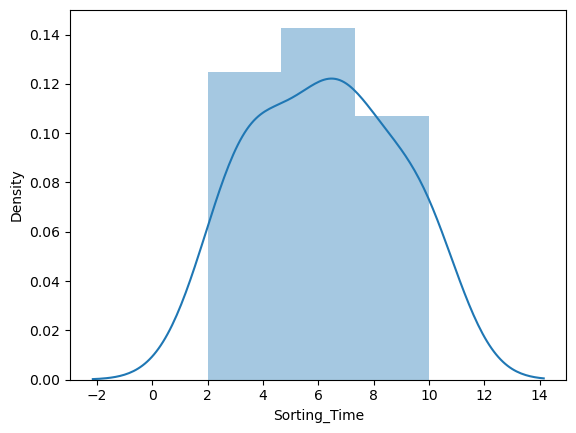

In [9]:
sns.distplot(deli['Sorting_Time']) #here we can see that Sorting_Time data column is normally distributed and without any skewness

In [10]:
print('The skewness of the Sorting Time Data Column is between -0.5 and 0.5 indicates that the distribution is fairly symmetrical. ', deli.Sorting_Time.skew())

The skewness of the Sorting Time Data Column is between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.  0.047115474210530174


In [11]:
print('The Kurtosis of the Sorting Time Data Column is Highly Peaked ', deli.Sorting_Time.kurtosis())

The Kurtosis of the Sorting Time Data Column is Highly Peaked  -1.14845514534878


In [12]:
deli.corr() #there is positive correlation (pearson's correlation) between Target variable and independent variable

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


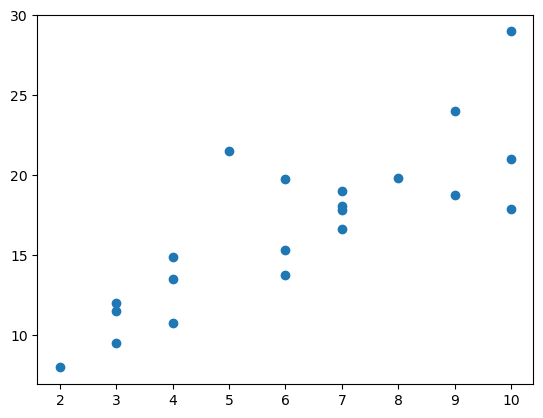

In [13]:
plt.scatter(deli.Sorting_Time,deli.Delivery_Time) #through this scatterplot we can see there is +ve correlation between the 2 columns


# Feature Scaling

In [14]:
#Normalization of the data
#from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [15]:

scaler = MinMaxScaler(feature_range=(0,1))
names=deli.columns
d=scaler.fit_transform(deli)
df=pd.DataFrame(d,columns=names)
df.head() #df is normalized data frame of deli

,Delivery_Time,Sorting_Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000


In [16]:
#Automatic EDA using sweetviz and creating html file
import sweetviz as sv
sweet_report = sv.analyze(deli)
sweet_report.show_html('delivery_time_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report delivery_time_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
df.head()

,Delivery_Time,Sorting_Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000


# Model1 Creation

In [18]:
#creating model
import statsmodels.formula.api as smf
model =smf.ols("Delivery_Time~Sorting_Time", data=df).fit()

In [19]:
model.params

Intercept       0.089561
Sorting_Time    0.628198
dtype: float64

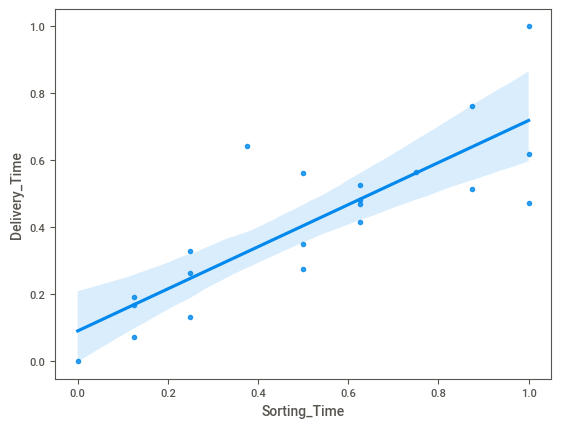

In [20]:
sns.regplot(x='Sorting_Time',y='Delivery_Time', data=df);
#after the regplot we can see there are influencing plot

In [21]:
print(model.tvalues,'\n', model.pvalues)#here pvalue of sorting time is <0.05 hence rejecting Null hypothesis 
#Sorting Time is actually dependent variable 

Intercept       1.496005
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.151079
Sorting_Time    0.000004
dtype: float64


In [22]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Test for Normality of Residuals (Q-Q Plot)

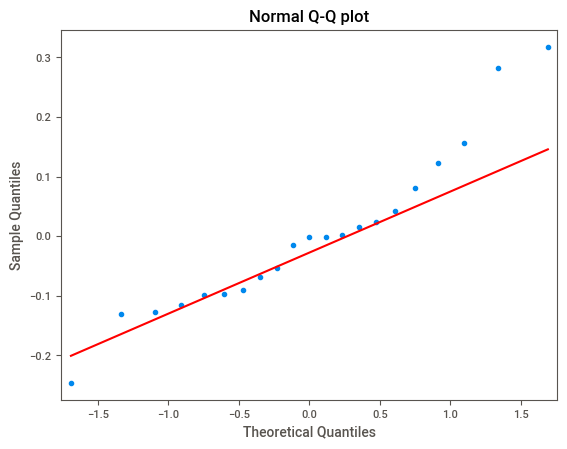

In [23]:
#qqplot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot")
plt.show()

# Residual Plot For Homoscedasticity

In [24]:
def get_standardized_values(vals):
    return((vals-vals.mean())/vals.std())


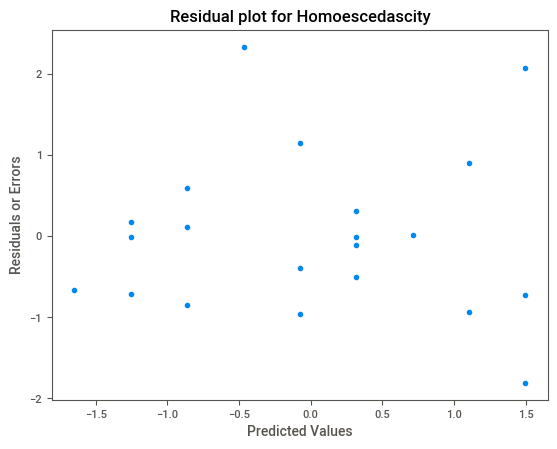

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual plot for Homoescedascity")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals or Errors")
plt.show()

# Residual vs Regressors

eval_env: 1


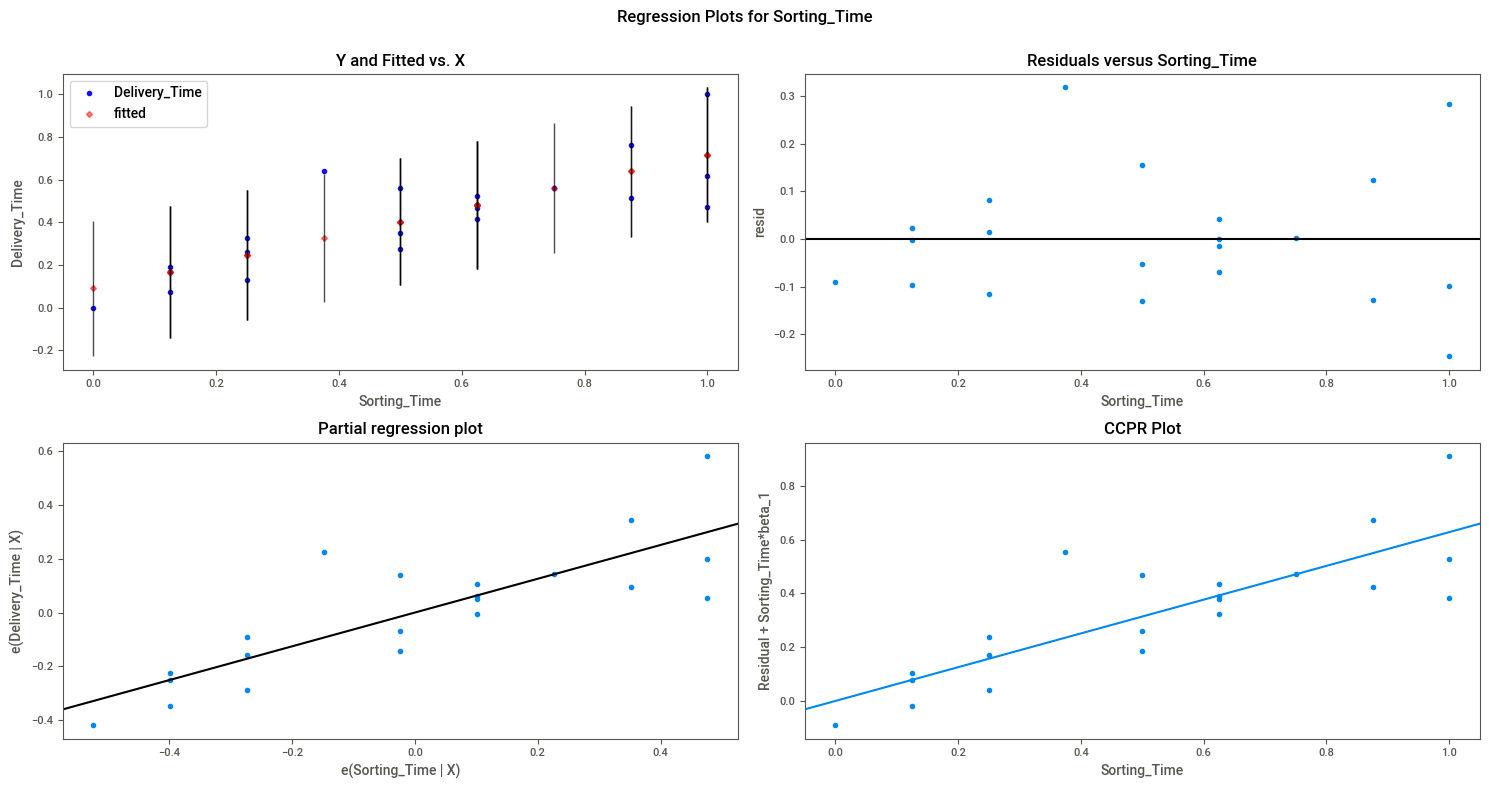

In [26]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Sorting_Time", fig=fig)
plt.show()

In [27]:
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance 
summary_cooks=model_influence.summary_frame()
summary_cooks.head()

,dfb_Intercept,dfb_Sorting_Time,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.147322,-0.278610,0.056517,-0.770600,0.159912,-0.336207,-0.762050,-0.332476
1,0.032245,-0.022432,0.000606,0.114391,0.084746,0.034808,0.111379,0.033891
2,0.148371,-0.019795,0.032861,1.142958,0.047900,0.256363,1.152810,0.258573
3,-0.099580,0.242465,0.052706,0.929723,0.108696,0.324673,0.926240,0.323457
4,-0.480507,0.908714,0.462053,2.203350,0.159912,0.961304,2.485504,1.084406


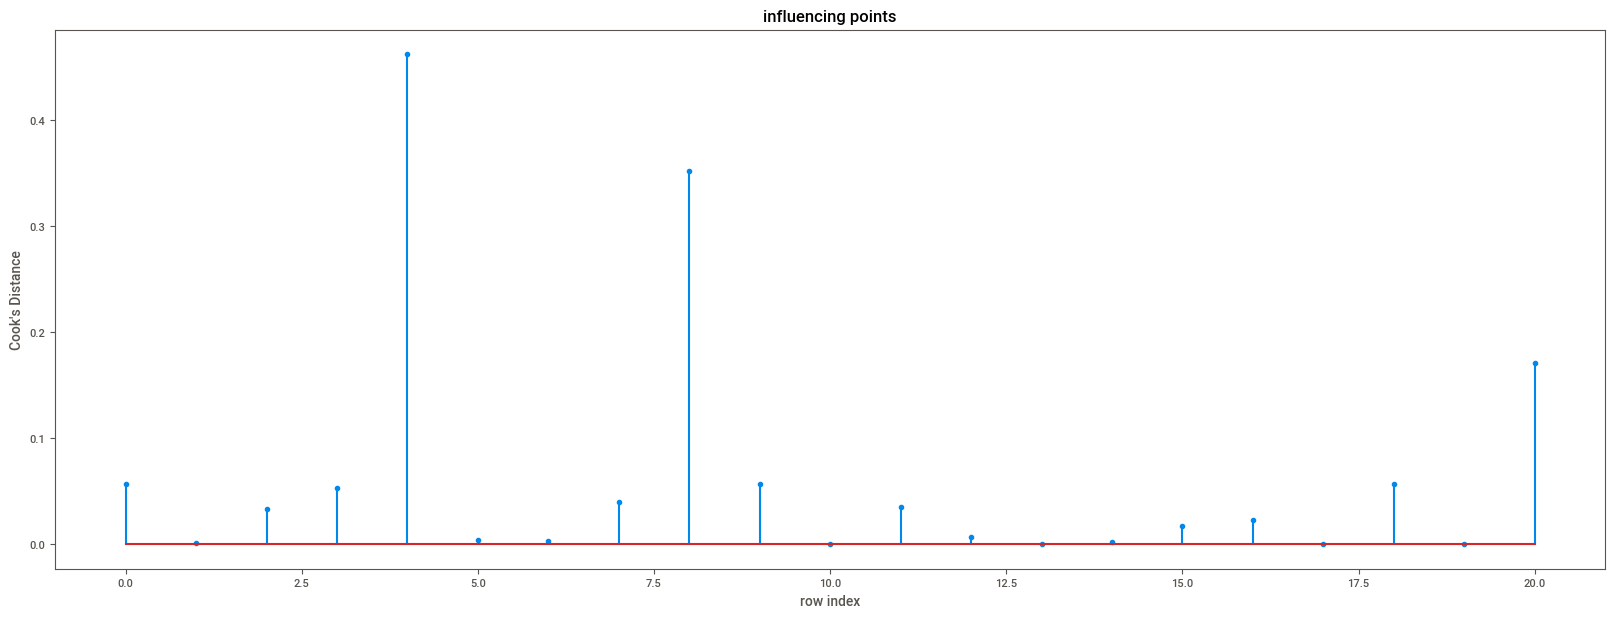

In [28]:
#plot the influencers using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.title("influencing points")
plt.xlabel("row index")
plt.ylabel("Cook's Distance")
plt.show()

### we can see that there are 2 high influencing points ,Cook's Distance threshold is given by 4/N or 4/(N-k-1) where N is no.of observation and k no. of explanatory varibles. 
### ref. - 1 Fox,John. (1991). Regression Diagnostics: An Intro.Sage Publications 
### so 4/N of Sorting Time its 4/20 = 0.2 is our threshold above 0.2 to be considered high influencing point

In [29]:
(np.argmax(c),np.max(c)) # here 4 is an influencing point 

(4, 0.46205304126503316)

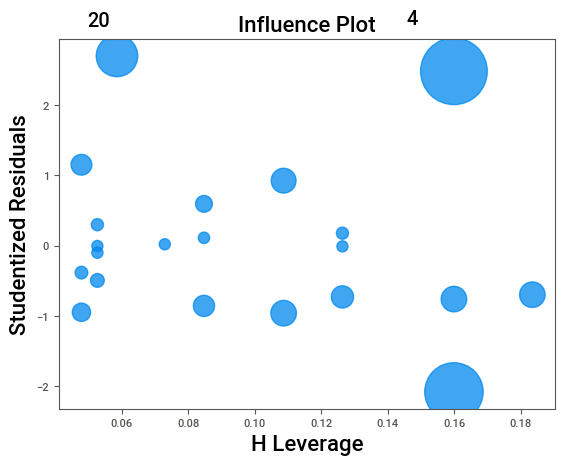

In [30]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

from the above bubble plot we can see that 4,20 high influencing points influencing the model we should replace ,retain or remove only 
when the domain experts suggest to  retain,replace or remove  the high influencing points


In [31]:
model.resid.mean()

1.8503717077085943e-16

In [32]:
import math 
from sklearn.metrics import mean_squared_error

In [33]:
mse_m1= mean_squared_error(df.Delivery_Time,model.fittedvalues) #checking for RMSE value 
rmse_m1=math.sqrt(mse_m1)
print("the difference between actual and predicted values of model1 is :---",rmse_m1)

the difference between actual and predicted values of model1 is :--- 0.13293572986008406


In [34]:
df.Sorting_Time.median()

0.5

In [35]:
##improving model
deli_1=pd.read_csv("C:\\Users\\Hi\\Desktop\\ExceLR Assignments\\delivery_time.csv")


In [36]:
from sklearn import preprocessing
import pandas as pd
scaler= preprocessing.MinMaxScaler()
names= deli_1.columns
d= scaler.fit_transform(deli_1)
scaled_df=pd.DataFrame(d,columns=names)
scaled_df.head()

,Delivery_Time,Sorting_Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000


In [37]:
#scaled_df.loc[4,'Sorting_Time']
scaled_df.Sorting_Time.median(),scaled_df.Sorting_Time.mean()

(0.5, 0.5238095238095238)

# Creating Model2 by Replacing 4 & 20 influencing points in Sorting column by sorting time median which is 0.5 in normalized data


In [38]:
scaled_df.loc[4,'Sorting_Time']=0.5
scaled_df.loc[20,'Sorting_Time']=0.5

In [39]:
scaled_df.head()

,Delivery_Time,Sorting_Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,0.500


In [40]:
import statsmodels.formula.api as smf
model2=smf.ols("Delivery_Time~Sorting_Time", data=scaled_df).fit()

In [41]:
model.params,    model2.params  #comparing model1 and model2 parameters

(Intercept       0.089561
 Sorting_Time    0.628198
 dtype: float64,
 Intercept       0.130251
 Sorting_Time    0.569946
 dtype: float64)

In [42]:
model2.rsquared,model2.rsquared_adj 
#R2 coefficient of determination determines accuracy of te model , here the model's accuracy has dropped after replacing data points with median

(0.4908362176421791, 0.4640381238338728)

In [43]:
mse_m2= mean_squared_error(scaled_df.Delivery_Time,model2.fittedvalues)
rmse_m2=math.sqrt(mse_m2)
print("the difference between actual and predicted values of model2 is :---",rmse_m2)

the difference between actual and predicted values of model2 is :--- 0.16828382429330135


# Creating Model3 by Dropping 4&20 rows to improve accuracy of the model 


In [44]:
deli_2=scaled_df.drop([4,20],axis=0)

In [45]:
deli_2.head()

,Delivery_Time,Sorting_Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
5,0.350000,0.500


In [46]:
model3=smf.ols("Delivery_Time~Sorting_Time",data=deli_2).fit()

In [47]:
model3.params,model2.params,model.params

(Intercept       0.085959
 Sorting_Time    0.572975
 dtype: float64,
 Intercept       0.130251
 Sorting_Time    0.569946
 dtype: float64,
 Intercept       0.089561
 Sorting_Time    0.628198
 dtype: float64)

In [48]:
model3.tvalues,'/n' , model3.pvalues

(Intercept       1.953668
 Sorting_Time    7.698826
 dtype: float64,
 '/n',
 Intercept       6.739820e-02
 Sorting_Time    6.129953e-07
 dtype: float64)

In [49]:
model3.rsquared,model3.rsquared_adj

(0.7771132785587765, 0.7640022949445869)

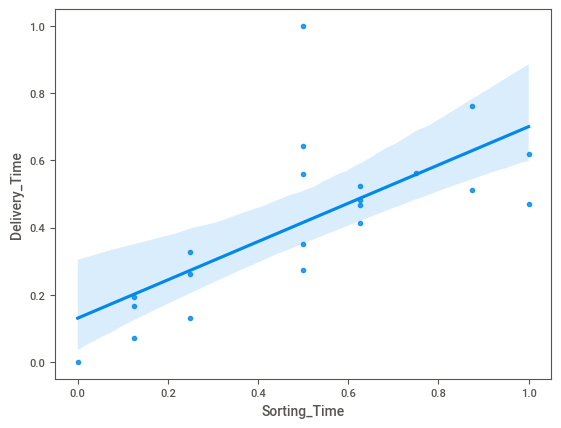

In [50]:
sns.regplot(x='Sorting_Time', y='Delivery_Time',data=scaled_df);

In [51]:
model3_influence=model3.get_influence()
(c3,_)=model3_influence.cooks_distance
summary3_cooks=model3_influence.summary_frame()
summary3_cooks.head()


,dfb_Intercept,dfb_Sorting_Time,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.097282,-0.180666,0.023672,-0.448408,0.190587,-0.217588,-0.437615,-0.212351
1,0.100412,-0.068344,0.005940,0.346725,0.089935,0.108997,0.337569,0.106118
2,0.269194,-0.010882,0.105034,1.944059,0.052656,0.458332,2.138668,0.504213
3,-0.264449,0.614387,0.266580,1.892757,0.129543,0.730178,2.066900,0.797358
5,-0.028529,0.001153,0.001512,-0.233252,0.052656,-0.054992,-0.226651,-0.053435


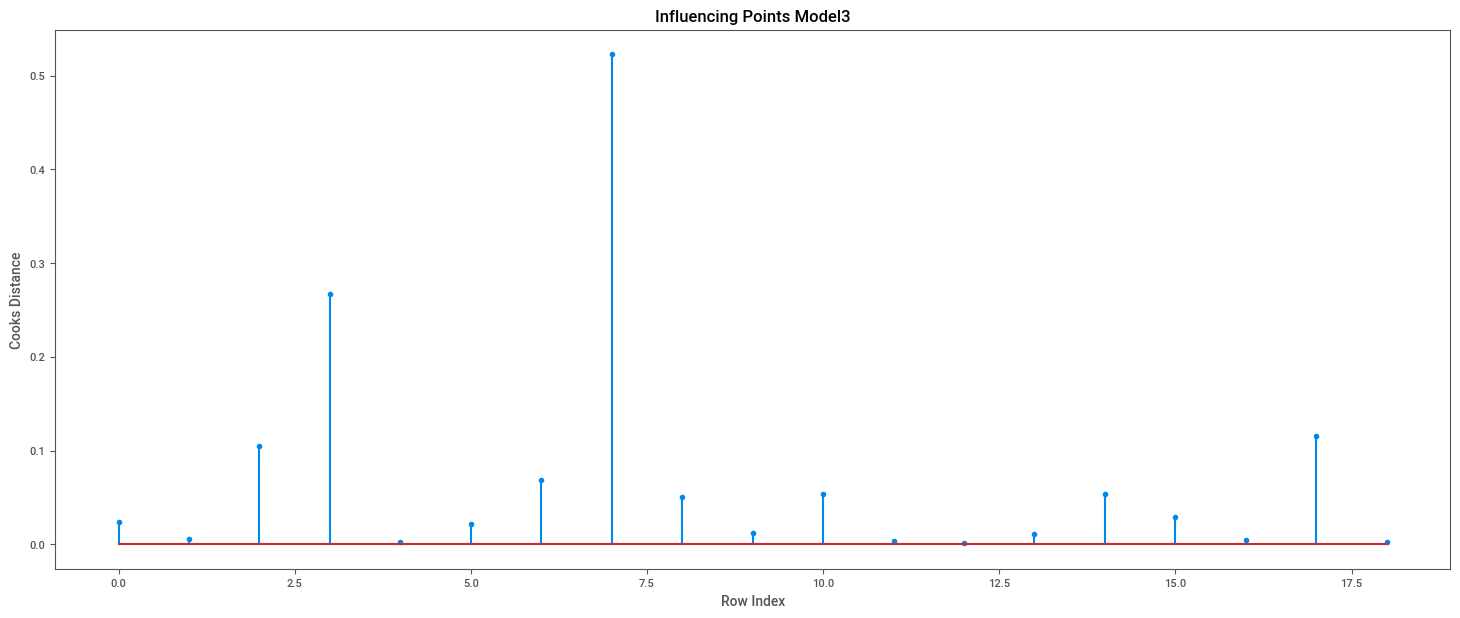

In [52]:
fig2=plt.subplots(figsize=(18,7))
plt.stem(np.arange(len(deli_2)),np.round(c3,3)) 
plt.title('Influencing Points Model3')
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

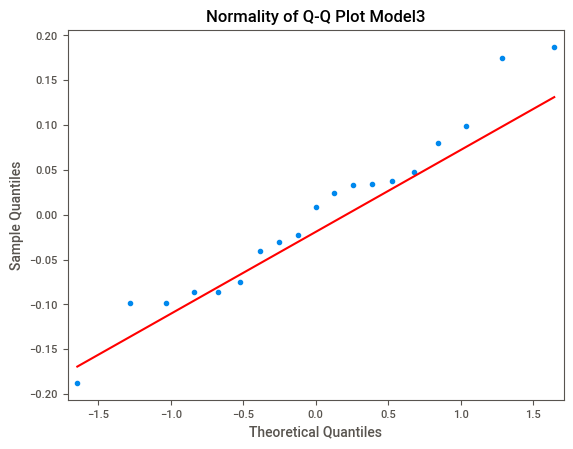

In [53]:
qqplot3=sm.qqplot(model3.resid,line='q') #qqplot of model3
plt.title('Normality of Q-Q Plot Model3')
plt.show()

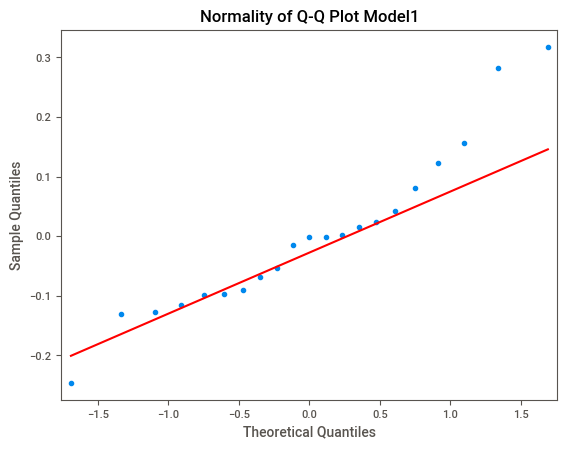

In [54]:
qqplot=sm.qqplot(model.resid,line='q') #qqplot of 1st model
plt.title('Normality of Q-Q Plot Model1')
plt.show()

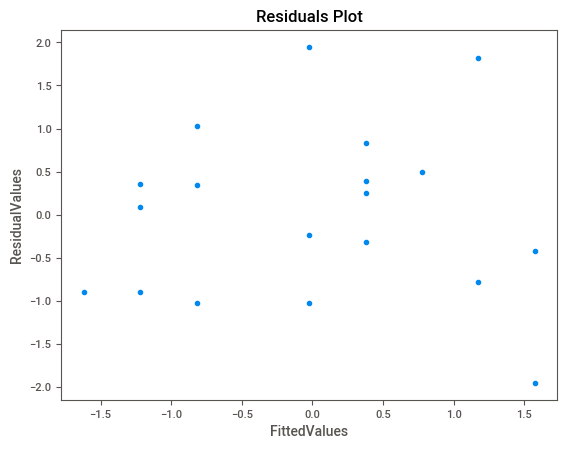

In [55]:
plt.scatter(get_standardized_values(model3.fittedvalues),get_standardized_values(model3.resid))
plt.title("Residuals Plot")
plt.xlabel("FittedValues")
plt.ylabel("ResidualValues")
plt.show() #There is no patterns in Residual vs Fitted Values ,hence No problem orelse we have to transform dataset in log or sigmoid or tanh

In [56]:
model3.rsquared,model3.rsquared_adj

(0.7771132785587765, 0.7640022949445869)

In [57]:
mse_m3= mean_squared_error(deli_2.Delivery_Time,model3.fittedvalues)
rmse_m3=math.sqrt(mse_m3)
print("the difference between actual and predicted values of model1 is :---",rmse_m3)

the difference between actual and predicted values of model1 is :--- 0.09352047119983505


# Model4 Creation by Cube Rooting every datapoint in the Dataset

In [58]:
df['cbrt_Delivery_Time']=np.cbrt(df['Delivery_Time']) #Transforming Dataset by Cube rooting the Delivery Time column
print('Skewness of Delivery_Time column without Transforming---->',deli.Delivery_Time.skew())
print('Skewness of Delivery_Time column with Feature Scaling And Cube root Transformation---->',df.cbrt_Delivery_Time.skew())
print('Kurtosis of Delivery_Time column without Transforming---->',deli.Delivery_Time.kurtosis())
print('Kurtosis of Delivery_Time column with Feature Scaling And Cube root Transformation---->',df.cbrt_Delivery_Time.kurtosis())
df['cbrt_Sorting_Time']=np.cbrt(df['Sorting_Time']) #Transforming Dataset by Cube rooting the Sorting Time column
print('Skewness of Sorting_Time column without Transforming---->',deli.Sorting_Time.skew())
print('Skewness of Sorting_Time column with Feature Scaling And Cube root Transformation---->',df.cbrt_Sorting_Time.skew())
print('Kurtosis of Sorting_Time column without Transforming---->',deli.Sorting_Time.kurtosis())
print('Kurtosis of Sorting_Time column with Feature Scaling And Cube root Transformation---->',df.cbrt_Sorting_Time.kurtosis())

Skewness of Delivery_Time column without Transforming----> 0.3523900822831107
Skewness of Delivery_Time column with Feature Scaling And Cube root Transformation----> -1.8576064364779223
Kurtosis of Delivery_Time column without Transforming----> 0.31795982942685397
Kurtosis of Delivery_Time column with Feature Scaling And Cube root Transformation----> 4.994929921831286
Skewness of Sorting_Time column without Transforming----> 0.047115474210530174
Skewness of Sorting_Time column with Feature Scaling And Cube root Transformation----> -1.6122394083910478
Kurtosis of Sorting_Time column without Transforming----> -1.14845514534878
Kurtosis of Sorting_Time column with Feature Scaling And Cube root Transformation----> 3.620161110474966


In [59]:
model4=smf.ols("cbrt_Delivery_Time~cbrt_Sorting_Time",data=df).fit()


In [60]:
model4.params,model3.params,model2.params, model.params


(Intercept            0.080135
 cbrt_Sorting_Time    0.827422
 dtype: float64,
 Intercept       0.085959
 Sorting_Time    0.572975
 dtype: float64,
 Intercept       0.130251
 Sorting_Time    0.569946
 dtype: float64,
 Intercept       0.089561
 Sorting_Time    0.628198
 dtype: float64)

In [61]:
model4.tvalues,'/n' , model4.pvalues


(Intercept             1.323366
 cbrt_Sorting_Time    10.721771
 dtype: float64,
 '/n',
 Intercept            2.014183e-01
 cbrt_Sorting_Time    1.693224e-09
 dtype: float64)

In [62]:
model4.rsquared,model4.rsquared_adj

(0.8581627674888582, 0.8506976499882718)

# Residual Analysis

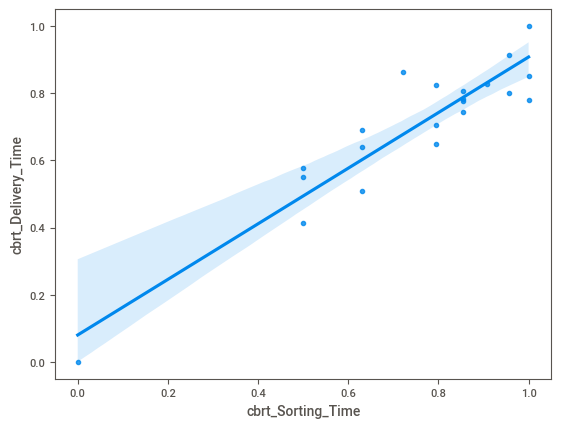

In [63]:
sns.regplot(x='cbrt_Sorting_Time', y='cbrt_Delivery_Time',data=df);

In [64]:
model4_influence=model4.get_influence()
(c4,_)=model4_influence.cooks_distance
summary4_cooks=model4_influence.summary_frame()
summary4_cooks.head()


,dfb_Intercept,dfb_cbrt_Sorting_Time,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.117388,-0.173003,0.028676,-0.707863,0.102702,-0.239481,-0.698252,-0.236230
1,0.083224,-0.054187,0.007383,0.480657,0.060075,0.121517,0.470708,0.119002
2,0.028041,0.046516,0.030507,1.084103,0.049352,0.247010,1.089420,0.248221
3,-0.065406,0.105409,0.013091,0.530072,0.085238,0.161807,0.519792,0.158669
4,-0.201211,0.296539,0.080153,1.183459,0.102702,0.400383,1.196852,0.404914


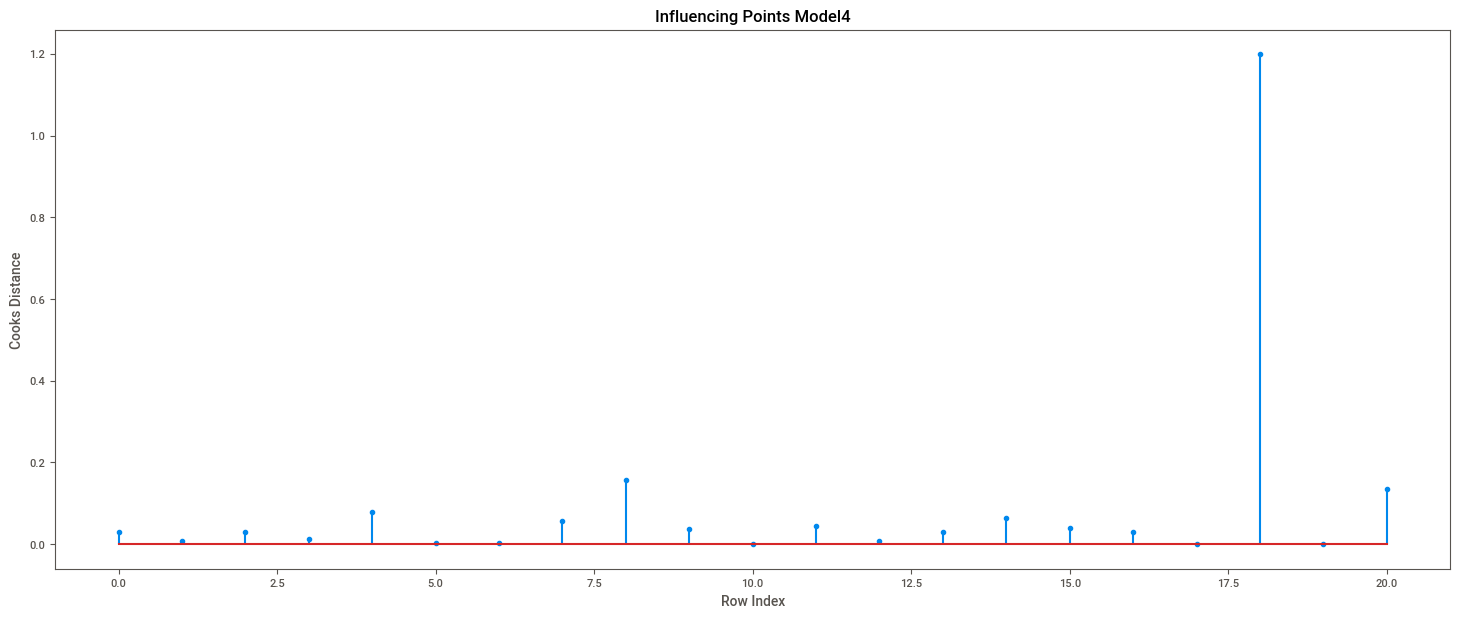

In [65]:
fig2=plt.subplots(figsize=(18,7))
plt.stem(np.arange(len(df)),np.round(c4,3)) 
plt.title('Influencing Points Model4')
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [66]:
(np.argmax(c4),np.max(c4)) #finding the most influencing datapoint ehich is above 4/N where N is no.of records 4/20=0.2

(18, 1.199428879535801)


# Test for Normality of Residuals (Q-Q Plot)

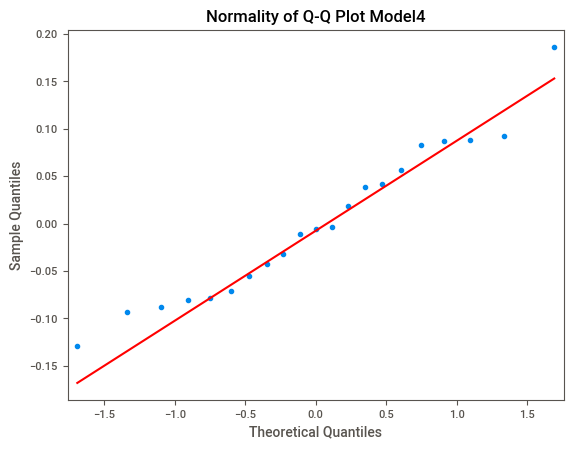

In [67]:
qqplot4=sm.qqplot(model4.resid,line='q') #qqplot of model4
plt.title('Normality of Q-Q Plot Model4')
plt.show()


# Residual Plot For Homoscedasticity

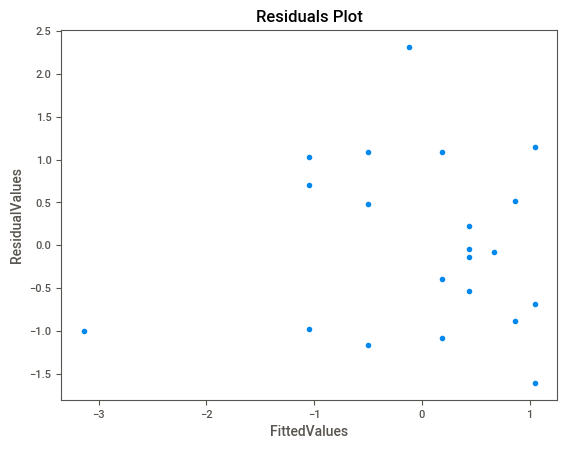

In [68]:
plt.scatter(get_standardized_values(model4.fittedvalues),get_standardized_values(model4.resid))
plt.title("Residuals Plot")
plt.xlabel("FittedValues")
plt.ylabel("ResidualValues")
plt.show() 



In [69]:
model4.rsquared,model3.rsquared,model2.rsquared, model.rsquared

(0.8581627674888582,
 0.7771132785587765,
 0.4908362176421791,
 0.6822714748417231)

In [70]:
model4.rsquared_adj,model3.rsquared_adj,model2.rsquared_adj, model.rsquared_adj


(0.8506976499882718,
 0.7640022949445869,
 0.4640381238338728,
 0.6655489208860244)

### MSE(Mean Squared Error), RMSE(Root Mean Squared Error), MAE(Mean Absolute Error), are the methods used to define loss function(actual-predicted values) , this measures error in our model , so that it give us to what extent the error rate is 
### here we are using RMSE which is the standard deviation of the Residuals(prediction errors), Residuals are a measure of how far from the regression line data points are . RMSE tells you how concentrated is the data around the BEST FIT LINE.

In [71]:
mse_m4= mean_squared_error(df.cbrt_Delivery_Time,model4.fittedvalues)
rmse_m4=math.sqrt(mse_m4)
print("the difference between actual and predicted values of model4 is :---",rmse_m4)

the difference between actual and predicted values of model4 is :--- 0.07843617878052518


# Model5 Creation by Log1p every datapoint in the dataset

In [72]:
df['log_Delivery_Time']=np.log1p(df['Delivery_Time']) #Transforming Dataset by log1p 
print('Skewness of Delivery_Time column without Transforming---->',deli.Delivery_Time.skew())
print('Skewness of Delivery_Time column with Feature Scaling And log1p Transformation---->',df.log_Delivery_Time.skew())
print('Kurtosis of Delivery_Time column without Transforming---->',deli.Delivery_Time.kurtosis())
print('Kurtosis of Delivery_Time column with Feature Scaling And log1p Transformation---->',df.log_Delivery_Time.kurtosis())
df['log_Sorting_Time']=np.log1p(df['Sorting_Time']) #Transforming Dataset by Cube rooting the Sorting Time column
print('Skewness of Sorting_Time column without Transforming---->',deli.Sorting_Time.skew())
print('Skewness of Sorting_Time column with Feature Scaling And log1p Transformation---->',df.log_Sorting_Time.skew())
print('Kurtosis of Sorting_Time column without Transforming---->',deli.Sorting_Time.kurtosis())
print('Kurtosis of Sorting_Time column with Feature Scaling And log1p Transformation---->',df.log_Sorting_Time.kurtosis())

Skewness of Delivery_Time column without Transforming----> 0.3523900822831107
Skewness of Delivery_Time column with Feature Scaling And log1p Transformation----> -0.10448237793850229
Kurtosis of Delivery_Time column without Transforming----> 0.31795982942685397
Kurtosis of Delivery_Time column with Feature Scaling And log1p Transformation----> -0.15858099863072006
Skewness of Sorting_Time column without Transforming----> 0.047115474210530174
Skewness of Sorting_Time column with Feature Scaling And log1p Transformation----> -0.23658351337827968
Kurtosis of Sorting_Time column without Transforming----> -1.14845514534878
Kurtosis of Sorting_Time column with Feature Scaling And log1p Transformation----> -1.0627548221625593


In [73]:
model5=smf.ols("log_Delivery_Time~log_Sorting_Time",data=df).fit()


In [74]:
model5.params,model4.params,model3.params,model2.params, model.params


(Intercept           0.062893
 log_Sorting_Time    0.682697
 dtype: float64,
 Intercept            0.080135
 cbrt_Sorting_Time    0.827422
 dtype: float64,
 Intercept       0.085959
 Sorting_Time    0.572975
 dtype: float64,
 Intercept       0.130251
 Sorting_Time    0.569946
 dtype: float64,
 Intercept       0.089561
 Sorting_Time    0.628198
 dtype: float64)

In [75]:
model5.tvalues,'/n' , model5.pvalues


(Intercept           1.464543
 log_Sorting_Time    7.171305
 dtype: float64,
 '/n',
 Intercept           1.593968e-01
 log_Sorting_Time    8.172715e-07
 dtype: float64)

In [76]:
model5.rsquared,model5.rsquared_adj

(0.730219469901549, 0.7160204946332094)

# Residual Analysis

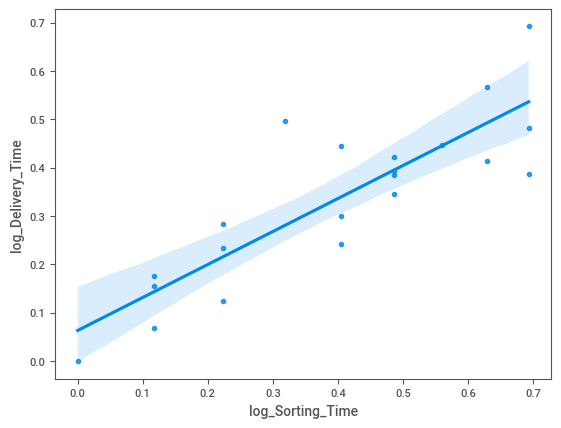

In [77]:

sns.regplot(x='log_Sorting_Time', y='log_Delivery_Time',data=df);


# Test for Normality of Residuals (Q-Q Plot)

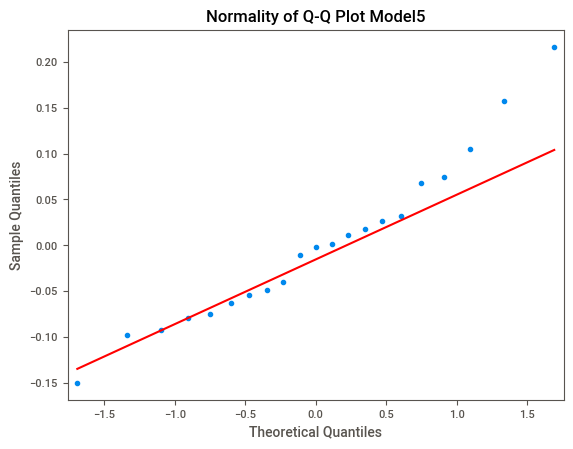

In [78]:

qqplot5=sm.qqplot(model5.resid,line='q') #qqplot of model5
plt.title('Normality of Q-Q Plot Model5')
plt.show()



# Residual Plot For Homoscedasticity

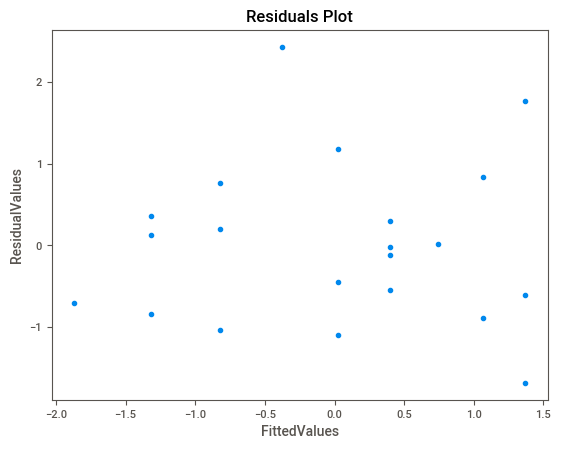

In [79]:

plt.scatter(get_standardized_values(model5.fittedvalues),get_standardized_values(model5.resid))
plt.title("Residuals Plot")
plt.xlabel("FittedValues")
plt.ylabel("ResidualValues")
plt.show() 

In [80]:

model5.rsquared,model4.rsquared,model3.rsquared,model2.rsquared, model.rsquared


(0.730219469901549,
 0.8581627674888582,
 0.7771132785587765,
 0.4908362176421791,
 0.6822714748417231)

In [81]:
model5.rsquared_adj,model4.rsquared_adj,model3.rsquared_adj,model2.rsquared_adj, model.rsquared_adj


(0.7160204946332094,
 0.8506976499882718,
 0.7640022949445869,
 0.4640381238338728,
 0.6655489208860244)

In [82]:
mse_m5= mean_squared_error(df.log_Delivery_Time,model5.fittedvalues)
rmse_m5=math.sqrt(mse_m5)
print("the difference between actual and predicted values of model5 is :---",rmse_m5)


the difference between actual and predicted values of model5 is :--- 0.08669197658171096


# Model6 Creation by Square rooting all datapoints in the dataset

In [83]:
df['sqrt_Delivery_Time']=np.sqrt(df['Delivery_Time']) #Transforming Dataset by square rooting 
print('Skewness of Delivery_Time column without Transforming---->',deli.Delivery_Time.skew())
print('Skewness of Delivery_Time column with Feature Scaling And Square Root Transformation---->',df.sqrt_Delivery_Time.skew())
print('Kurtosis of Delivery_Time column without Transforming---->',deli.Delivery_Time.kurtosis())
print('Kurtosis of Delivery_Time column with Feature Scaling And Square Root Transformation---->',df.sqrt_Delivery_Time.kurtosis())
df['sqrt_Sorting_Time']=np.sqrt(df['Sorting_Time']) #Transforming Dataset by Cube rooting the Sorting Time column
print('Skewness of Sorting_Time column without Transforming---->',deli.Sorting_Time.skew())
print('Skewness of Sorting_Time column with Feature Scaling And Square root Transformation---->',df.sqrt_Sorting_Time.skew())
print('Kurtosis of Sorting_Time column without Transforming---->',deli.Sorting_Time.kurtosis())
print('Kurtosis of Sorting_Time column with Feature Scaling And Square root Transformation---->',df.sqrt_Sorting_Time.kurtosis())

Skewness of Delivery_Time column without Transforming----> 0.3523900822831107
Skewness of Delivery_Time column with Feature Scaling And Square Root Transformation----> -0.9407302362957057
Kurtosis of Delivery_Time column without Transforming----> 0.31795982942685397
Kurtosis of Delivery_Time column with Feature Scaling And Square Root Transformation----> 1.479885336621336
Skewness of Sorting_Time column without Transforming----> 0.047115474210530174
Skewness of Sorting_Time column with Feature Scaling And Square root Transformation----> -0.8165621359684068
Kurtosis of Sorting_Time column without Transforming----> -1.14845514534878
Kurtosis of Sorting_Time column with Feature Scaling And Square root Transformation----> 0.42410511279891283


In [84]:

model6=smf.ols("sqrt_Delivery_Time~sqrt_Sorting_Time",data=df).fit()


In [85]:
model6.params,model5.params,model4.params,model3.params,model2.params, model.params


(Intercept            0.096812
 sqrt_Sorting_Time    0.757264
 dtype: float64,
 Intercept           0.062893
 log_Sorting_Time    0.682697
 dtype: float64,
 Intercept            0.080135
 cbrt_Sorting_Time    0.827422
 dtype: float64,
 Intercept       0.085959
 Sorting_Time    0.572975
 dtype: float64,
 Intercept       0.130251
 Sorting_Time    0.569946
 dtype: float64,
 Intercept       0.089561
 Sorting_Time    0.628198
 dtype: float64)

In [86]:
model6.tvalues,'/n' , model6.pvalues


(Intercept            1.527136
 sqrt_Sorting_Time    8.645387
 dtype: float64,
 '/n',
 Intercept            1.432034e-01
 sqrt_Sorting_Time    5.195982e-08
 dtype: float64)

In [87]:
model6.rsquared,model6.rsquared_adj

(0.7973175680577437, 0.7866500716397302)

# Residual Analysis

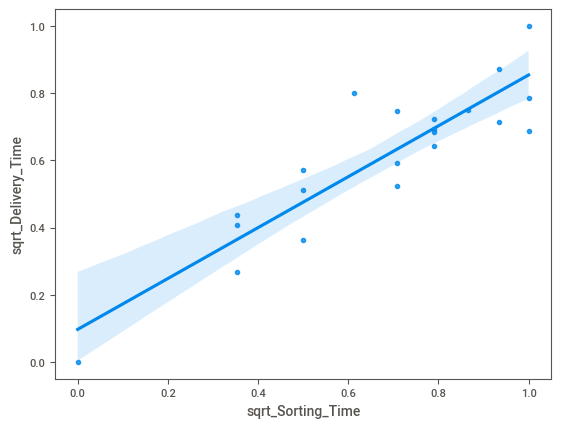

In [88]:
sns.regplot(x='sqrt_Sorting_Time', y='sqrt_Delivery_Time',data=df);


# Test for Normality of Residuals (Q-Q Plot)

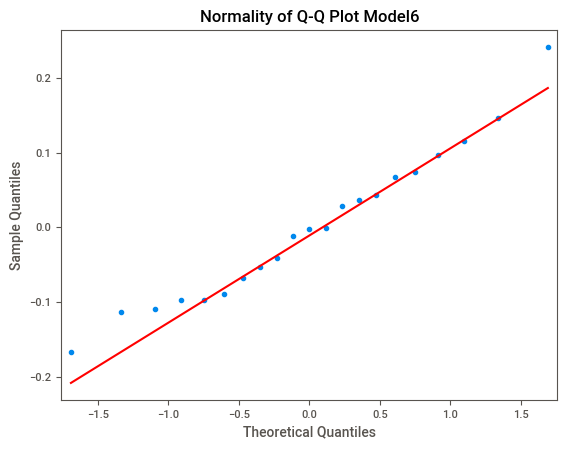

In [89]:
qqplot6=sm.qqplot(model6.resid,line='q') #qqplot of model6
plt.title('Normality of Q-Q Plot Model6')
plt.show()


# Residual Plot For Homoscedasticity

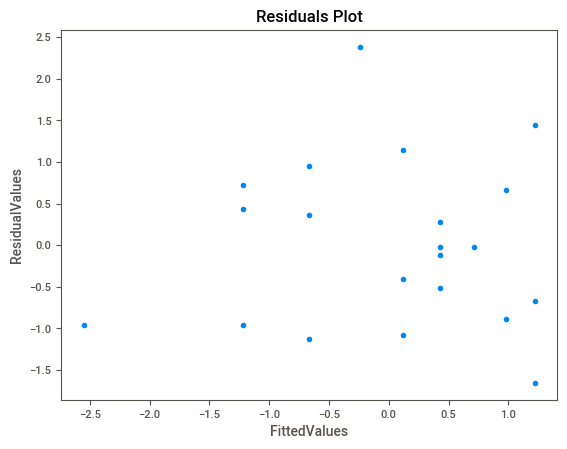

In [90]:
plt.scatter(get_standardized_values(model6.fittedvalues),get_standardized_values(model6.resid))
plt.title("Residuals Plot")
plt.xlabel("FittedValues")
plt.ylabel("ResidualValues")
plt.show() 

In [91]:


model6.rsquared,model5.rsquared,model4.rsquared,model3.rsquared,model2.rsquared, model.rsquared


(0.7973175680577437,
 0.730219469901549,
 0.8581627674888582,
 0.7771132785587765,
 0.4908362176421791,
 0.6822714748417231)

In [92]:
model6.rsquared_adj,model5.rsquared_adj,model4.rsquared_adj,model3.rsquared_adj,model2.rsquared_adj, model.rsquared_adj


(0.7866500716397302,
 0.7160204946332094,
 0.8506976499882718,
 0.7640022949445869,
 0.4640381238338728,
 0.6655489208860244)

In [93]:
mse_m6= mean_squared_error(df.sqrt_Delivery_Time,model6.fittedvalues)
rmse_m6=math.sqrt(mse_m6)
print("the difference between actual and predicted values of model6 is :---",rmse_m6)


the difference between actual and predicted values of model6 is :--- 0.09882398803574519


In [94]:
print("Model1_Adjusted_Rsquared:",model.rsquared_adj,",","Model2_Adjusted_Rsquared:",model2.rsquared_adj,",","Model3_Adjusted_Rsquared:",model3.rsquared_adj,",","Model4_Adjusted_Rsquared:",model4.rsquared_adj,",","Model5_Adjusted_Rsquared:",model5.rsquared_adj,",","Model6_Adjusted_Rsquared:",model6.rsquared_adj)

Model1_Adjusted_Rsquared: 0.6655489208860244 , Model2_Adjusted_Rsquared: 0.4640381238338728 , Model3_Adjusted_Rsquared: 0.7640022949445869 , Model4_Adjusted_Rsquared: 0.8506976499882718 , Model5_Adjusted_Rsquared: 0.7160204946332094 , Model6_Adjusted_Rsquared: 0.7866500716397302


In [95]:
print("RMSE-Model1---",rmse_m1,",", "RMSE-Model 2---",rmse_m2, ",","RMSE-Model 3---", rmse_m3,",", "RMSE-Model4---", rmse_m4,",", "RMSE-Model5---", rmse_m5,",", "RMSE-Model6---", rmse_m6)

RMSE-Model1--- 0.13293572986008406 , RMSE-Model 2--- 0.16828382429330135 , RMSE-Model 3--- 0.09352047119983505 , RMSE-Model4--- 0.07843617878052518 , RMSE-Model5--- 0.08669197658171096 , RMSE-Model6--- 0.09882398803574519


#### Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.

# Model4 is Ready to predict with 85% accuracy because adjusted rsquared value is 0.85 in model4 we have transformed data to Cube root and use ORDINARY LEAST SQUARES METHOD